# Case Study on Measures of Central Tendency and Dispersion

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
##Read the dataset to python environment.

df=pd.read_csv('StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [6]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000
std,15.569567,14.706436,15.226381
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


This gives statistics summary about the data set

In [7]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

The data is clean

# Find out how many males and females participated in the test.

In [7]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

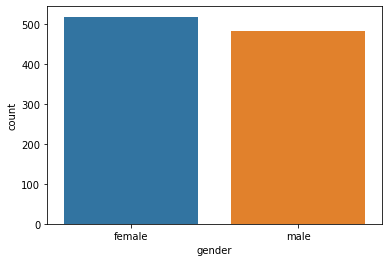

In [8]:
sns.countplot(data=df,x='gender') 

# What do you think about the students' parental level of education?

In [11]:
df['parental level of education'].value_counts()


some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

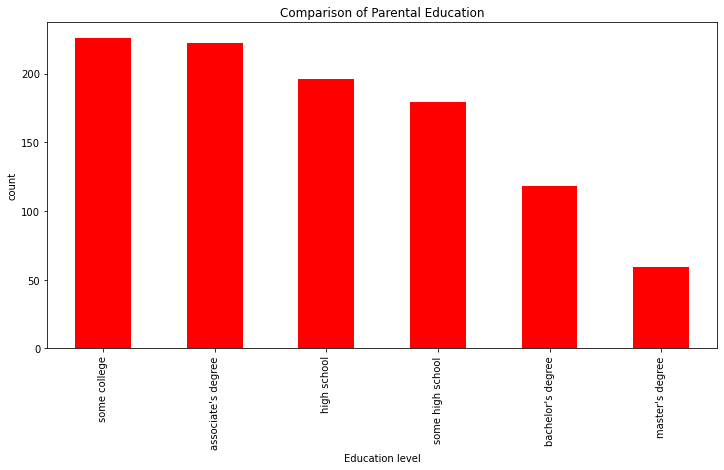

In [10]:
plt.subplots(figsize=(12,6))
df['parental level of education'].value_counts(normalize = True)
df['parental level of education'].value_counts(dropna = False).plot.bar(color=[ 'red'])
plt.title('Comparison of Parental Education')
plt.xlabel('Education level')
plt.ylabel('count')
plt.show()

Parents education varies at different level in which most of them are highly educated and few have masters degree also.

# Who scores the most on average for math, reading and writing based on a) Gender b)Test preparation course

In [13]:
cols = ['math score','reading score','writing score']
avg_gen=df.groupby('gender')[cols].mean().round(2)
avg_gen

,math score,reading score,writing score
gender,,,
female,63.38,72.59,72.47
male,68.82,65.55,63.45


female students scored better in writing and reading.Male students performed well in maths

In [74]:
avg_test=df.groupby('test preparation course')[cols].mean().round(2)
avg_test

,math score,reading score,writing score
test preparation course,,,
completed,69.97,74.18,74.68
none,63.79,66.42,64.46


Those who have completed test preparation course scored better than the other students

# What do you think about the scoring variation for math, reading and writing based on ● Gender ● Test preparation course

In [80]:
cols = ['math score','reading score','writing score']
var_gen=df.groupby('gender')[cols].var().round(2)
var_gen

,math score,reading score,writing score
gender,,,
female,256.96,207.68,220.37
male,211.89,200.21,202.41


scoring variation amomg female students is more compared to male students in all three categories of marking

In [81]:
cols = ['math score','reading score','writing score']
var_test=df.groupby('test preparation course')[cols].var().round(2)
var_test

,math score,reading score,writing score
test preparation course,,,
completed,210.88,183.27,175.20
none,246.67,213.42,226.25


# '''The management needs your help to give bonus points to the top 25% of students  based on their maths score, so how will you help the management to achieve this'''


In [5]:

q75 = df['math score'].quantile(q=0.75)
df[df['math score'].ge(q75)]



,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
414,female,group A,high school,free/reduced,completed,77,88,85
415,female,group B,master's degree,free/reduced,completed,77,97,94
416,female,group B,bachelor's degree,free/reduced,none,77,85,87
417,female,group B,master's degree,standard,none,77,90,84
418,female,group B,high school,standard,completed,77,82,89
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [15]:
data = df['math score']
data
third_quartile = np.quantile(data, 0.75)
third_quartile

77.0

Students scored more than 77 marks in maths can be made eligible for scholarship